Train loaded: (560000, 2)
Test loaded: (38000, 2)
Cleaning text...


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 150, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_5             │ (None, 150, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 150, 128)       │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,704,257 (10.32 MB)

 Trainable params: 2,704,257 (10.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 94s 46ms/step - accuracy: 0.8835 - loss: 0.2684 - val_accuracy: 0.9418 - val_loss: 0.1489
Epoch 2/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 89s 45ms/step - accuracy: 0.9387 - loss: 0.1590 - val_accuracy: 0.9475 - val_loss: 0.1349
Epoch 3/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 89s 45ms/step - accuracy: 0.9485 - loss: 0.1359 - val_accuracy: 0.9492 - val_loss: 0.1334
Epoch 4/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 89s 45ms/step - accuracy: 0.9539 - loss: 0.1210 - val_accuracy: 0.9484 - val_loss: 0.1363
Epoch 5/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 89s 45ms/step - accuracy: 0.9600 - loss: 0.1065 - val_accuracy: 0.9479 - val_loss: 0.1464


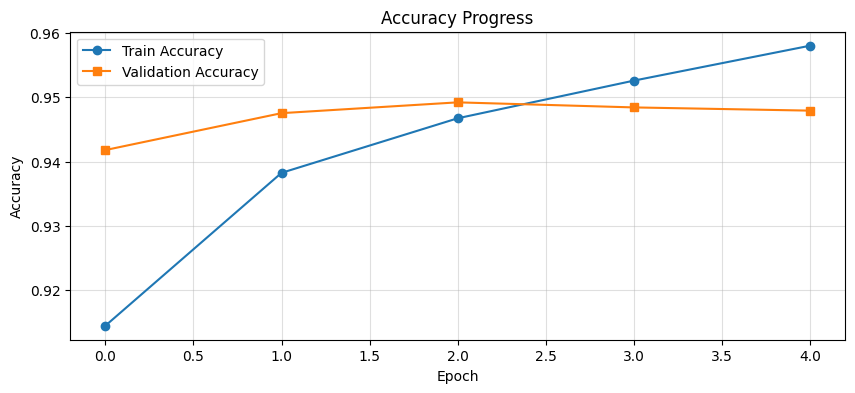

1188/1188 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step

==== METRICS ====
Accuracy : 0.937921052631579
Precision: 0.9480372623983631
Recall   : 0.9266315789473685
F1 Score : 0.9372122115461394

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     19000
           1       0.95      0.93      0.94     19000

    accuracy                           0.94     38000
   macro avg       0.94      0.94      0.94     38000
weighted avg       0.94      0.94      0.94     38000



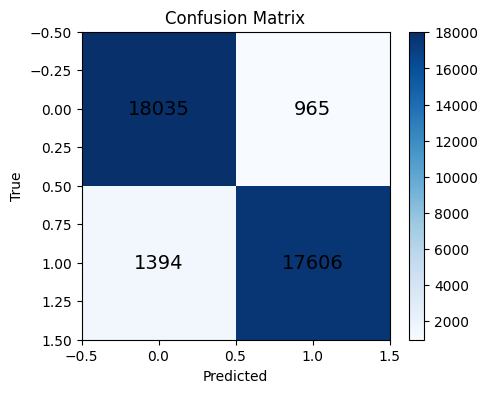


==== TEST RESULTS ====
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Text: The food was amazing and the staff was incredibly friendly!
Sentiment: Positive (confidence: 0.9940)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Text: Great atmosphere, delicious meals, and perfect service.
Sentiment: Positive (confidence: 0.9984)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Text: I loved it! Everything was perfect.
Sentiment: Positive (confidence: 0.9967)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Text: This was the worst restaurant I have ever visited.
Sentiment: Negative (confidence: 0.9998)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Text: Nothing was good. Very disappointed.
Sentiment: Negative (confidence: 0.9340)
------------------------------------------------------------
1/1 ━━

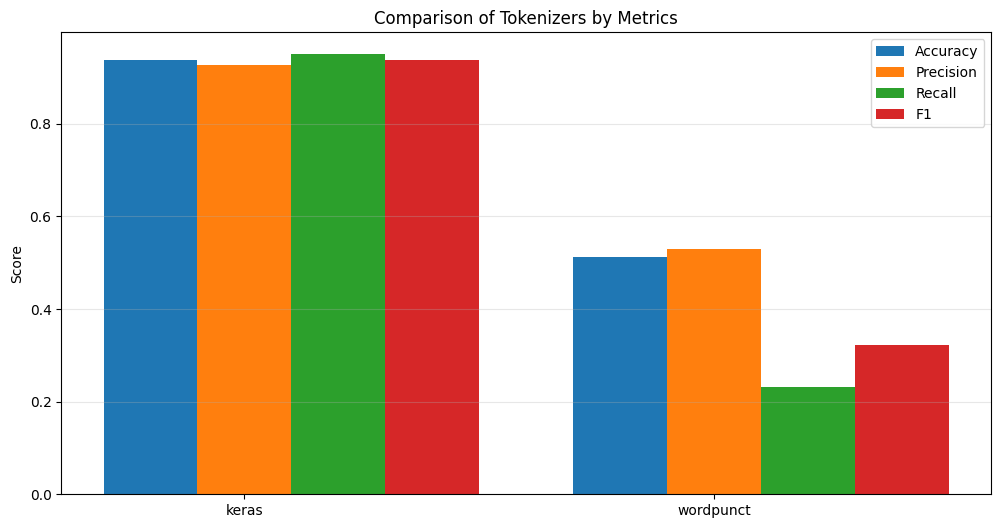

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import tensorflow as tf
from tensorflow.keras import layers
from nltk.tokenize import WordPunctTokenizer

from nltk.corpus import stopwords
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
)

try:
    stop_words = set(stopwords.words("english"))
except LookupError:
    nltk.download("stopwords", quiet=True)
    stop_words = set(stopwords.words("english"))


train_path = "/kaggle/input/yelp-review-polarity/yelp_review_polarity_csv/train.csv"
test_path  = "/kaggle/input/yelp-review-polarity/yelp_review_polarity_csv/test.csv"

df_train = pd.read_csv(train_path, header=None, names=["label", "text"])
df_test  = pd.read_csv(test_path, header=None, names=["label", "text"])

print("Train loaded:", df_train.shape)
print("Test loaded:", df_test.shape)

df_train["label"] = df_train["label"].apply(lambda x: 1 if x == 2 else 0)
df_test["label"]  = df_test["label"].apply(lambda x: 1 if x == 2 else 0)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens)

print("Cleaning text...")
df_train["clean"] = df_train["text"].apply(clean_text)
df_test["clean"]  = df_test["text"].apply(clean_text)

MAX_WORDS = 20000
MAX_LEN = 150

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df_train["clean"])

X_train = pad_sequences(tokenizer.texts_to_sequences(df_train["clean"]), maxlen=MAX_LEN)
X_test  = pad_sequences(tokenizer.texts_to_sequences(df_test["clean"]),  maxlen=MAX_LEN)

y_train = df_train["label"].values
y_test  = df_test["label"].values

model = Sequential([
    layers.Input(shape=(MAX_LEN,)),
    Embedding(input_dim=MAX_WORDS, output_dim=128),
    SpatialDropout1D(0.25),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.25)),
    Bidirectional(LSTM(32, dropout=0.25)),
    Dense(64, activation="relu"),
    Dropout(0.4),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.build(input_shape=(None, MAX_LEN))
model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=256
)

history_data = history.history

plt.figure(figsize=(10, 4))
plt.plot(history_data["accuracy"], marker='o', label="Train Accuracy")
plt.plot(history_data["val_accuracy"], marker='s', label="Validation Accuracy")
plt.title("Accuracy Progress")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n==== METRICS ====")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")

plt.title("Confusion Matrix")
plt.colorbar()

for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i][j], ha='center', va='center', fontsize=14, color="black")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

def sentiment(text):
    processed = clean_text(text)
    seq = tokenizer.texts_to_sequences([processed])
    pad = pad_sequences(seq, maxlen=MAX_LEN)
    prob = float(model.predict(pad)[0][0])
    if prob > 0.5:
        confidence = prob
        label = "Positive"
    else:
        confidence = 1 - prob
        label = "Negative"

    return label, confidence


test_sentences = [
    # Positive
    "The food was amazing and the staff was incredibly friendly!",
    "Great atmosphere, delicious meals, and perfect service.",
    "I loved it! Everything was perfect.",

    # Negative
    "This was the worst restaurant I have ever visited.",
    "Nothing was good. Very disappointed.",
    "I will never come here again.",

    # Long sentences
    "Although the place looked promising at first and the staff smiled a lot, "
    "the food took ages to arrive and tasted bland, which made the whole experience underwhelming.",
    "I was really hoping for a better visit because my friend recommended this highly, "
    "but unfortunately I didn't enjoy it at all.",
]

print("\n==== TEST RESULTS ====")

for text in test_sentences:
    label, prob = sentiment(text)
    print(f"Text: {text}")
    print(f"Sentiment: {label} (confidence: {prob:.4f})")
    print("-" * 60)



print("======== TOKENIZATION COMPARISON ========")

wpt = WordPunctTokenizer()

tokenizers_to_test = {}

tokenizers_to_test["keras"] = tokenizer

tokenizers_to_test["wordpunct"] = WordPunctTokenizer()

def tokenize_texts(texts, tok):
    if isinstance(tok, Tokenizer):
        seq = tok.texts_to_sequences(texts)
        return pad_sequences(seq, maxlen=MAX_LEN)

    elif isinstance(tok, WordPunctTokenizer):
        seq = [wpt.tokenize(t) for t in texts]
        vocab = {}
        idx = 1
        encoded = []
        for tokens in seq:
            row = []
            for tok in tokens:
                if tok not in vocab:
                    vocab[tok] = idx
                    idx += 1
                row.append(vocab[tok])
            encoded.append(row)
        return pad_sequences(encoded, maxlen=MAX_LEN)


def build_model():
    m = Sequential([
        layers.Input(shape=(MAX_LEN,)),
        Embedding(input_dim=MAX_WORDS, output_dim=128),
        SpatialDropout1D(0.25),
        Bidirectional(LSTM(64, return_sequences=True, dropout=0.25)),
        Bidirectional(LSTM(32, dropout=0.25)),
        Dense(64, activation="relu"),
        Dropout(0.4),
        Dense(1, activation="sigmoid")
    ])
    m.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return m


results = []

for name, tok in tokenizers_to_test.items():
    print(f"\n===== TOKENIZER: {name} =====")

    X_train_tok = tokenize_texts(df_train["clean"], tok)
    X_test_tok  = tokenize_texts(df_test["clean"], tok)

    model_tok = build_model()
    model_tok.fit(
        X_train_tok, y_train,
        validation_split=0.1,
        epochs=2,
        batch_size=256,
        verbose=0
    )

    pred = (model_tok.predict(X_test_tok) > 0.5).astype(int)

    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    results.append([name, acc, prec, rec, f1])

pd_results = pd.DataFrame(results, columns=["Tokenizer", "Accuracy", "Precision", "Recall", "F1"])
print("\n\n===== COMPARISON TABLE =====")
print(pd_results)

plt.figure(figsize=(12, 6))

metrics = ["Accuracy", "Precision", "Recall", "F1"]
x = np.arange(len(pd_results["Tokenizer"]))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(
        x + i * width,
        pd_results[metric],
        width=width,
        label=metric
    )

plt.xticks(x + width, pd_results["Tokenizer"])
plt.ylabel("Score")
plt.title("Comparison of Tokenizers by Metrics")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.show()